In [1]:
from mdagent import MDAgent
import os
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_4_descriptive = get_prompt("descriptive", 4)
prompt_4_natural = get_prompt("natural", 4)

prompt_4_descriptive, prompt_4_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD.',
 'Simulate 1LYZ for 1 ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD of the simulation.')

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_4_descriptive)

Thought: I'll help complete these tasks step by step. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have the PDB file, let's analyze its secondary structure using ComputeDSSP. Then we'll set up and run a simulation, and finally compute the RMSD.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_222634",
        "target_frames": "first"
    }
}
```

Thought: Now that we have the secondary structure information, let's set up and run a short simulation. We'll use the SetUpandRunFunction with appropriate parameters for a 1 ps simulation at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_222634",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3p.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
   

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_222634: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_222634
 rec0_222637: dssp values for trajectory with id: 1LYZ_222634
 1LYZ_222647: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_222652: Initial positions for simulation sim0_222652
 sim0_222652: Basic Simulation of Protein 1LYZ_222647
 rec0_222656: Simulation trajectory for protein 1LYZ_222647 and simulation sim0_222652
 rec1_222656: Simulation state log for protein 1LYZ_222647 and simulation sim0_222652
 rec2_222656: Simulation pdb frames for protein 1LYZ_222647 and simulation sim0_222652
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_223139: RMSD plot for 1LYZ


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_222634"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_222634", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_222656")
top_path_1 = registry_1.get_mapped_path("top_sim0_222652")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

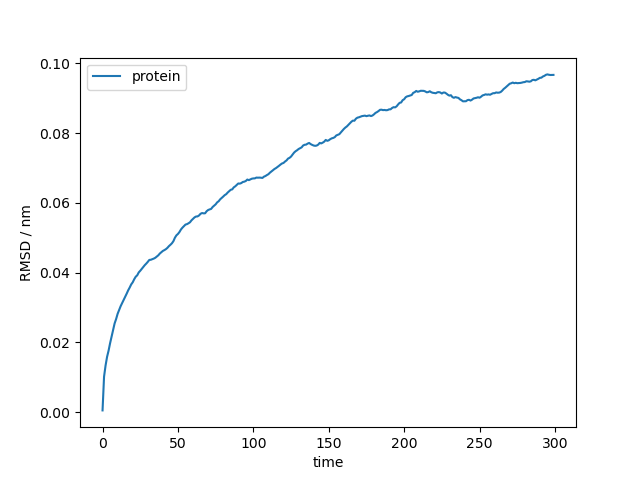

In [9]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_223139'))

In [10]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_4_natural)

Thought: Let me break this down into steps:
1. First, I need to download the PDB file for 1LYZ
2. Then I'll need to clean it and prepare it for simulation
3. Run a simulation
4. Analyze the secondary structure
5. Calculate RMSD

Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I'll clean it and prepare it for simulation. Then I'll run a short simulation with the specified parameters (1 ps at 300 K).

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_223309",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constr

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [11]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_223309: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_223309
 1LYZ_223319: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_223324: Initial positions for simulation sim0_223324
 sim0_223324: Basic Simulation of Protein 1LYZ_223319
 rec0_223328: Simulation trajectory for protein 1LYZ_223319 and simulation sim0_223324
 rec1_223328: Simulation state log for protein 1LYZ_223319 and simulation sim0_223324
 rec2_223328: Simulation pdb frames for protein 1LYZ_223319 and simulation sim0_223324
 rec0_224022: dssp values for trajectory with id: rec2_223328
 rmsd_223324: RMSD for 223324
 fig0_224027: RMSD plot for 223324


In [12]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_223309"))

In [13]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_223309", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [14]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_223328")
top_path_2 = registry_2.get_mapped_path("top_sim0_223324")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

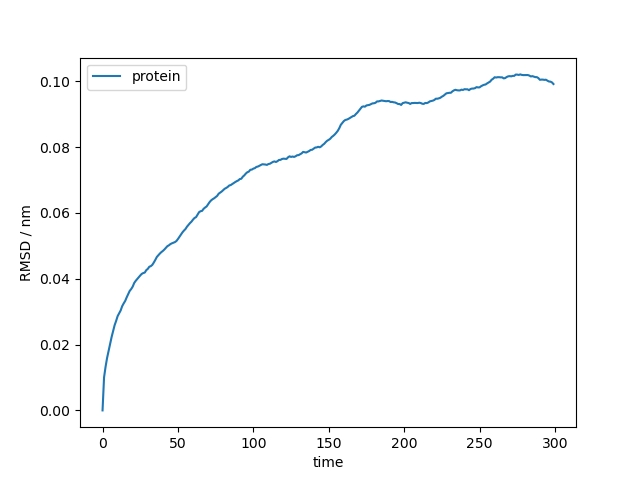

In [15]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_224027'))